## Homework 9

### Clustering Algorithms: 
Clustering is a type of Unsupervised learning. This is very often used when you don’t have labeled data. K-Means Clustering is one of the popular clustering algorithm. The goal of this algorithm is to find groups(clusters) in the given data. [1]

![title](clustering.jpg)

### k-Means Algorithm:

K-means clustering is a simple unsupervised learning algorithm that is used to solve clustering problems. It follows a simple procedure of classifying a given data set into a number of clusters, defined by the letter "k," which is fixed beforehand. The clusters are then positioned as points and all observations or data points are associated with the nearest cluster, computed, adjusted and then the process starts over using the new adjustments until a desired result is reached.[2]


The k-means algorithm works as follows, assuming the inputs x1, x2, x3, ..., xn

Step 1 - Pick k random points as cluster centers called centroids.

Step 2 - Assign each xi to nearest cluster by calculating its distance to each centroid.

Step 3 - Find new cluster center by taking the average of the assigned points.

Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change. [1]

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.[5]

### Use Cases [1]
K-Means is widely used for many applications.

* Image Segmentation
* Clustering Gene Segementation Data
* News Article Clustering
* Clustering Languages
* Species Clustering
* Anomaly Detection

##### Implementation of the code [4]

In [5]:
#Call required libraries
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans #For clustering

import os                     # For os related operations
import sys                    # For data size

### Data Setup
Things to consider while preparing the data. [3]

##### Missing value Handling: 
k-Means clustering just cannot deal with missing values. Any observation even with one missing dimension must be specially handled.There are various methods available for missing value imputation which can be a blog post in itself, but care must be taken to ensure that missing imputation doesn’t distort distance calculation implicit in k-Means algorithm. For example, replacing missing age with -1 or missing income with 999999 can be misleading!

##### Data normalization:
Distance computation in k-Means weights each dimension equally and hence care must be taken to ensure that unit of dimension shouldn’t distort relative near-ness of observations.

##### Random initialization :
k-Means clustering is prone to initial seeding i.e. random initialization of centroids which is required to kick-off iterative clustering process. Bad initialization may end up getting bad clusters. Fig. 4 shows one example where for  if initial seed happens to be one each in red, blue and green regions then we get true clustering (left image), but we may get wrong clustering (middle, right images) at other initial location.


Let's start by importing the data.

In [5]:
df = pd.read_csv("data/2017.csv") #Read the dataset
df.head

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [7]:
print("Dimension of dataset: wh.shape")
df.dtypes

Dimension of dataset: wh.shape


Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

Correlation among variables

Now let's compute the correlation heat map so that we can understand the correlation between the variables.

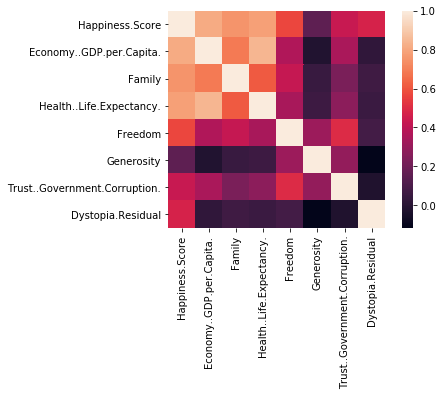

In [9]:
df1 = df[['Happiness.Score','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.', 'Freedom', 
          'Generosity','Trust..Government.Corruption.','Dystopia.Residual']] #Subsetting the data
cor = df1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

We can see that happiness score is highly correlated with GDP per capita, family and life expectancy. It is least correlated with generosity.

In this implementation eight parameters are being considered -  namely: happiness score, GDP per capita, family, life expectancy, freedom, generosity, corruption and Dystopia residual for clustering the countries. Since the clustering is sensitive to range of data. It is advisable to scale the data before proceeding.[2]

In [10]:
#Scaling of data
ss = StandardScaler()
ss.fit_transform(df1)

array([[ 1.93599602,  1.50618765,  1.20357658, ...,  0.8569643 ,
         1.90308437,  0.85629599],
       [ 1.92269283,  1.18651768,  1.26503623, ...,  0.80685634,
         2.73999784,  0.92989102],
       [ 1.90672969,  1.1823454 ,  1.47266877, ...,  1.70201314,
         0.30006609,  0.94796425],
       ...,
       [-1.77816933, -1.12910094, -0.51306362, ...,  0.79923322,
        -0.56334657, -2.4660431 ],
       [-2.17193469, -2.12929212, -1.95262416, ..., -0.31596505,
        -0.38459935, -0.33549229],
       [-2.35994869, -2.34773594, -4.15212515, ...,  0.253028  ,
        -0.65680192,  0.43290816]])

### k-Means Algorithm Implementation

In [13]:
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(df1, 2)
kmeans = pd.DataFrame(clust_labels)
df1.insert((df1.shape[1]),'kmeans',kmeans)

Let's plot the obtained clusters after k-means.

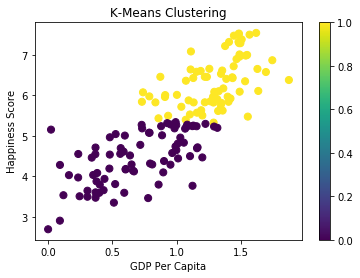

In [19]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df1['Economy..GDP.per.Capita.'],df1['Happiness.Score'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP Per Capita')
ax.set_ylabel('Happiness Score')
plt.colorbar(scatter)

Graph Discussion:

The above graph shows the formation of clusters - 2 clusters in this case. The purple dots represents a cluster of countries that have low GDP Per Capita with low Happiness Score. And the yellow dots represents a cluster of countries with hight GDP per capita and hight happiness score. The clusters show us the relationship between GDP per Capita and Happiness Score as well. The boundary between the two clusters seems to be a happiness score of 5.2.

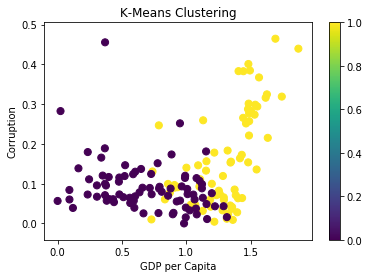

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df1['Economy..GDP.per.Capita.'],df1['Trust..Government.Corruption.'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

Graph Discussion:

The above graph displays the k-means clustering results with Trust in government against corruption and GDP per capita. The two clusters show relationship between trust on government and DDP. When the trust is low, GDP is low too - represented by purple dots. The yellow dots show the opposite. But there's a bit of overlap among the two clusters so this might not be the optimal perspective on the clusters that were created from the data that we had.

### Citation

[1] Mubaris NK, “K-Means Clustering in Python.” URL - https://mubaris.com/posts/kmeans-clustering/

[2] Technopedia, "K-Means Clustering." URL - K-Means Clustering

[3] EduPristine,"Beyond the k-Means – Prepping the Data." URL - https://www.edupristine.com/blog/k-means-algorithm

[4] Dhanya Jothimani, "Basic Visualization and Clustering in Python." URL - https://www.kaggle.com/dhanyajothimani/basic-visualization-and-clustering-in-python

[5] Sci-kit Learn, "Clustering." URL - https://scikit-learn.org/stable/modules/clustering.html#k-means

Dataset from: https://www.kaggle.com/unsdsn/world-happiness#2017.csv